#Sampling Rate vs Signal Length

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


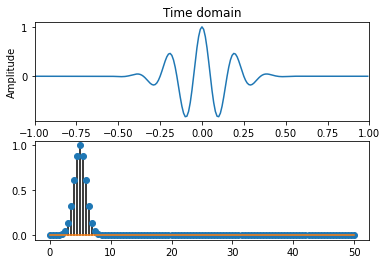

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


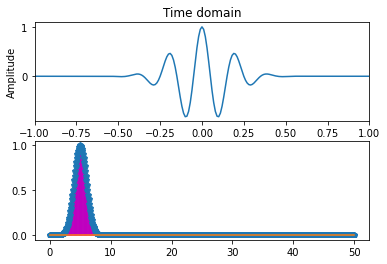

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


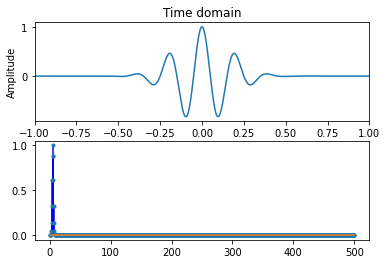

In [12]:
## difference between sampling rate and number of time points for Fourier frequencies

# temporal parameters
srates  = [100, 100, 1000]
timedur = [  1,  10,    1]
freq    = 5 # in Hz, for the signal

colors  = 'kmb'
symbols = 'op.'

for parami in range(0,len(srates)):
    
    # define sampling rate in this round
    srate = srates[parami] # in Hz
    
    # define time
    time = np.arange(-1,timedur[parami],1/srate)
    
    # create signal (Morlet wavelet)
    signal = np.multiply( np.cos(2*np.pi*freq*time) , np.exp( (-time**2) / .05 ) )
    #Morlet Wavelet = Sine * Gaussian
    
    # compute FFT and normalize
    signalX = scipy.fftpack.fft(signal)
    signalX = signalX/np.max(signalX)
    
    # define vector of frequencies in Hz
    hz = np.linspace(0,srate/2,int(np.floor(len(signal)/2)+1))
    
    
    # plot time-domain signal
    plt.subplot2grid((2,1), (0,0))
    plt.plot(time,signal,label='')
    plt.xlim([-1,1])
    plt.xlabel('Time (s)'), plt.ylabel('Amplitude')
    plt.title('Time domain')
    
    # plot frequency-domain signal
    plt.subplot2grid((2,1), (1,0))
    plt.stem(hz,np.abs(signalX[0:len(hz)]),colors[parami],symbols[parami],'-')
    plt.show()

In the frequecny domain; while the first two go until the nyquist frequency (50Hz), the last one goes until the 500Hz (its Nyqusit frequency).

Q. Which has the highest frequency Resolution?

A. It's the second one because it goes on the longest; it has the most number of time points & that's why it has the highest frequency resolution.